In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


## Attention

In [ ]:
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf 

In [ ]:
data_count = 10000
input_dims = 32
attention_column = 7

In [ ]:
def make_data(batch_size, input_size, attention_index): 
    """
    학습데이터를 만듭니다. 
    한 배치만 보고 설명하면, 입력데이터는 input_size 길이이며, attention_index를 제외한 곳은 
    전부 랜덤한 수로 설정됩니다.
    목표 데이터(y)는 0 또는 1이며 이 값과 입력 데이터의 attention_index 위치의 값은 같습니다. 
    """
    train_x = np.random.standard_normal(size=(batch_size, input_size))
    train_y = np.random.randint(low=0, high=2, size=(batch_size, 1))

    train_x[:, attention_index] = train_y[:, 0]
    return train_x, train_y

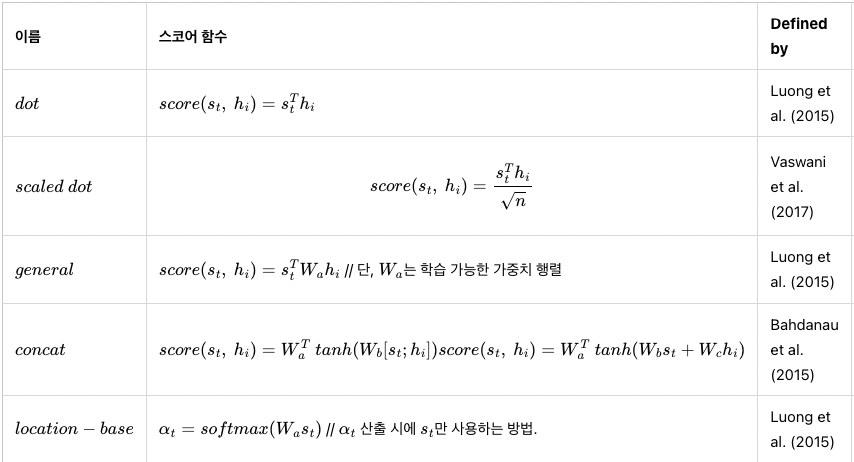

다양한 Attenton 방식들이 있지만, 가장 간단한 `Luong et al.`의 `location-base`으로 구현해봅시다. 

In [ ]:
train_x, train_y = make_data(data_count, input_dims,  attention_column)

In [ ]:
train_x[1]

array([ 0.09522339, -1.26021888,  0.51211556,  1.08224843,  0.93203339,
        0.09134562, -0.86914529,  1.        ,  1.50432316, -0.45558176,
       -1.56253544, -2.3837863 , -0.46099801,  0.17406324,  1.25358805,
        0.82725861,  0.88870281, -1.03487277,  0.80467535,  0.10479565,
       -1.16220729,  0.68904461,  1.22963028, -0.88172528,  1.08643465,
        0.06258685, -0.07218285, -0.91861411,  0.94245633, -0.04956393,
        0.67153446,  0.71050466])

In [ ]:
train_y

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
# Input Layer

inputs = tf.keras.Input(shape=(32,))

# Attention Layer
attention_probs = layers.Dense(input_dims, activation='softmax')(inputs)
attention_mul = layers.multiply([inputs, attention_probs])

# FC Layer
y = layers.Dense(64)(attention_mul)
y = layers.Dense(1, activation = 'sigmoid')(y)

model = models.Model(inputs, y)
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['acc'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 32)           1056        ['input_2[0][0]']                
                                                                                                  
 multiply_1 (Multiply)          (None, 32)           0           ['input_2[0][0]',                
                                                                  'dense_3[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 64)           2112        ['multiply_1[0][0]']       

In [ ]:
# Train
train_x, train_y = make_data(data_count, input_dims,  attention_column)

model.fit(train_x, train_y, epochs = 20, batch_size = 64, validation_split = 0.2)

Epoch 1/20
 12/125 [=>............................] - ETA: 0s - loss: 0.6932 - acc: 0.4766 

2022-12-18 17:02:16.696256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 1s 6ms/step - loss: 0.6858 - acc: 0.5759 - val_loss: 0.6658 - val_acc: 0.6330
Epoch 2/20
  1/125 [..............................] - ETA: 0s - loss: 0.6621 - acc: 0.6719

2022-12-18 17:02:17.389201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 1s 5ms/step - loss: 0.6084 - acc: 0.7520 - val_loss: 0.5327 - val_acc: 0.7770
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 0.4571 - acc: 0.8065 - val_loss: 0.3787 - val_acc: 0.8510
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2988 - acc: 0.8903 - val_loss: 0.2158 - val_acc: 0.9250
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.1359 - acc: 0.9661 - val_loss: 0.0770 - val_acc: 0.9895
Epoch 6/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0382 - acc: 0.9970 - val_loss: 0.0194 - val_acc: 0.9990
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0101 - acc: 0.9999 - val_loss: 0.0066 - val_acc: 1.0000
Epoch 8/20
125/125 [==============================] - 1s 6ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 9/20
125/125 [==============================] - 1s 6ms/step - loss: 0.0021 - acc:

In [ ]:
# Test
test_x, test_y = make_data(data_count, input_dims, attention_column)

result = model.evaluate(test_x, test_y, batch_size = 64)
print("Loss : ", result[0])
print("Acc : ", result[1])

157/157 [==============================] - 1s 3ms/step - loss: 1.6170e-04 - acc: 1.0000
Loss :  0.00016169642913155258
Acc :  1.0


In [ ]:
att_model = models.Model(inputs, attention_probs)

att_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
Total params: 1,056
Trainable params: 1,056
Non-trainable params: 0
_________________________________________________________________


199/313 [==================>...........] - ETA: 0s

2022-12-18 17:02:30.492927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 770us/step


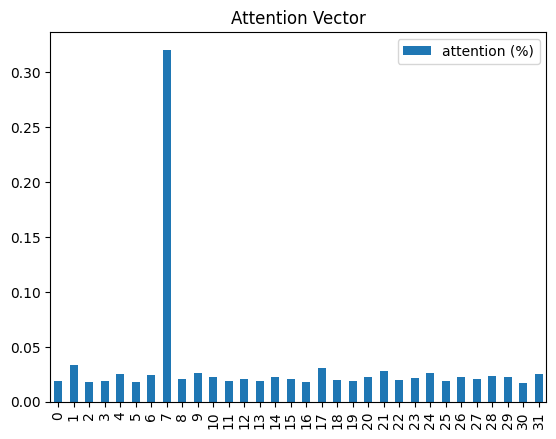

In [ ]:
test_att_score = att_model.predict(test_x)

pd.DataFrame(np.mean(test_att_score, axis=0), columns = ["attention (%)"]).plot(kind='bar', title="Attention Vector")
plt.show()

In [ ]:
test_att_score.shape

(10000, 32)

In [ ]:
np.mean(test_att_score, axis=0).shape

(32,)